The dataset we are using is the Open University Learning Analytics Dataset. It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

We will explore the data a bit to see what types of things we can count and what type of graphs and visuals we can generate.



In [10]:
#First we import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the Data

student_info = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentInfo.csv")
assessments = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/assessments.csv")
student_assessment = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentAssessment.csv")
courses = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/courses.csv")
student_registration = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentRegistration.csv")
student_vle = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/studentVle.csv")
vle = pd.read_csv("C:/Users/jeffr/Downloads/anonymisedData/vle.csv")

The dataset we are using is the Open University Learning Analytics Dataset. It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

We will explore the data a bit to see what types of things we can count and what type of graphs and visuals we can generate.
Since the final measurable in this dataset is how the student performed at the end, we will be comparing different demographic factors such as gender and region against the student's final results in the course. 

Summary
7 modules are being offered in 22 presentations (3.14 presentations per module)
32593 registrations from 28785 students (1.13 registrations per student)
10655280 VLE engagements per student per course in a day with 6364 VLEs (1674.31 interactions per VLE)


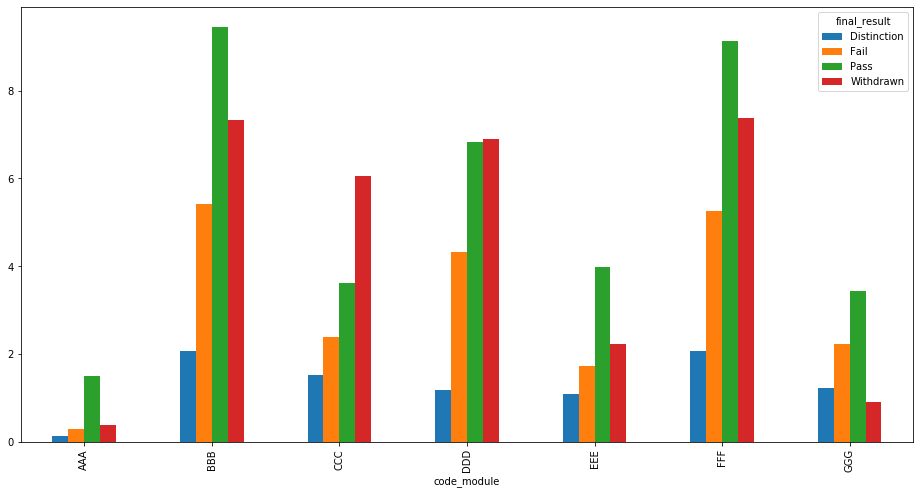

In [6]:
#grabbing information from the csv files.

num_modules = courses.code_module.nunique()
num_presentations = courses.code_presentation.count()
num_students = student_info.id_student.nunique()
num_registrations = student_registration.id_student.count()
num_interactions = student_vle.id_site.count()
num_vles = vle.id_site.count()

print ("Summary")
print ("{0} modules are being offered in {1} presentations ({2} presentations per module)"
       .format(num_modules, num_presentations, round(num_presentations / num_modules, 2)))
print ("{0} registrations from {1} students ({2} registrations per student)"
       .format(num_registrations, num_students, round(num_registrations / num_students, 2)))
print ("{0} VLE engagements per student per course in a day with {1} VLEs ({2} interactions per VLE)"
       .format(num_interactions, num_vles, round(num_interactions / num_vles, 2)))

# Visualize pass, fail and withdrawn percentages
%matplotlib inline
visualization_fields = ['code_module']
for field in visualization_fields:
    pd.crosstab(student_info[field], student_info['final_result']).apply(lambda r: (r / len(student_info)) * 100,
                                                                         axis=1).plot.bar(figsize=(16, 8))

From this bar graph, we can see the final results of students in the different modules. 

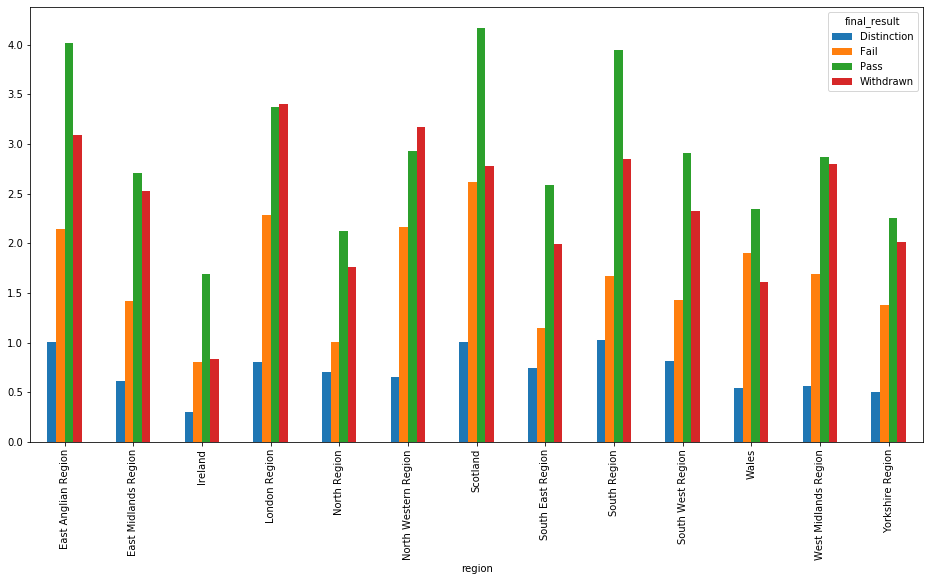

In [7]:
%matplotlib inline
visualization_fields = ['region']
for field in visualization_fields:
    pd.crosstab(student_info[field], student_info['final_result']).apply(lambda r: (r / len(student_info)) * 100,
                                                                         axis=1).plot.bar(figsize=(16, 8))

This bar graph shows how well students performed when separated based upon region the student is from.

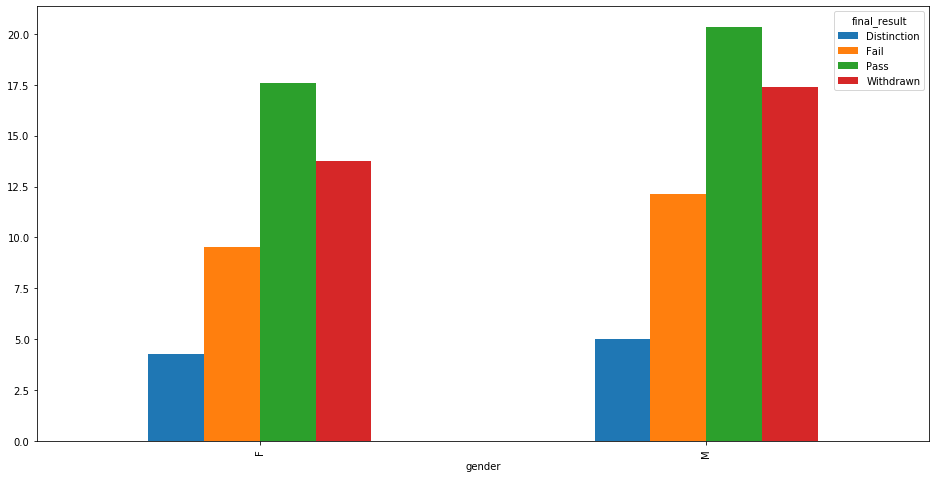

In [8]:
%matplotlib inline
visualization_fields = ['gender']
for field in visualization_fields:
    pd.crosstab(student_info[field], student_info['final_result']).apply(lambda r: (r / len(student_info)) * 100,
                                                                         axis=1).plot.bar(figsize=(16, 8))

This graph appears to show that men and women performed quite similarly in the course. 

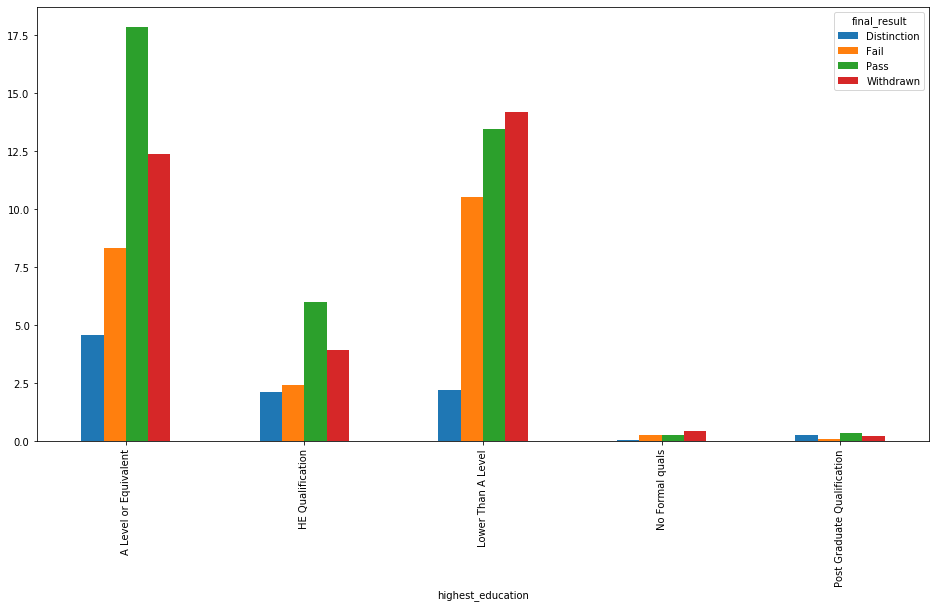

In [9]:
%matplotlib inline
visualization_fields = ['highest_education']
for field in visualization_fields:
    pd.crosstab(student_info[field], student_info['final_result']).apply(lambda r: (r / len(student_info)) * 100,
                                                                         axis=1).plot.bar(figsize=(16, 8))

This graph shows educational level vs final result in the modules. There does not seem to be an obvious connection at first glance. 


Looking at the plots I have generated, there are some insights that we can do further exploration on such as effects of gender on final result in the course. Depending on what we wish to do, we can create the narrative we want. A trend that would make our story more complete and applicable would be to compare final result of students in the course with the number of times they interacted with the virtual environment. We would expect to see that those students who interacted more with the material would have lower withdrawal rates. 

For my Capstone Project, I would like to build a model that predicts student withdrawal rates based on demographic factors and amount of interaction that student had with the material. I hope to be able to identify at risk students for withdrawing from the course, so that we may help them earlier on and perhaps save them from withdrawing from the course. 